# 梯度
f(x)相对于x的梯度是包含n个偏导数的向量
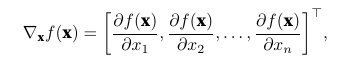  
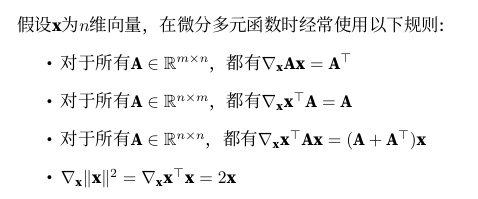

# 自动微分


In [36]:
import torch
# grad存储梯度
x = torch.arange(4.0,requires_grad=True)
x.grad # 默认是None
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [37]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

In [38]:
# 反向传播函数，自动计算x每个分量的梯度
y.backward()
# t=2x^T x的梯度应该是4x
x.grad

tensor([ 0.,  4.,  8., 12.])

In [39]:
# 验证梯度是否正确
x.grad == 4 * x

tensor([True, True, True, True])

In [40]:
# 再来试一个函数
# 注意，这里要把梯度清0，默认情况下，PyTorch会累计梯度
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## 分离计算
假设y是关于x的函数，z是作为y和x的函数，现在要计算z关于x的梯度，现在希望将y视为一个常数，并且只考虑x在y被计算后发挥的作用

In [42]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [43]:
#由于记录了y的计算结果，随后可以在y上调用反向传播，得到y=x*x的倒数
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])